In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

data = pd.read_csv('train.csv')

data["Sex"] = data["Sex"].map({"male": 1, "female": 2})
data["Embarked"] = data["Embarked"].map({"C": 1, "Q": 2, "S": 3})


In [3]:

data = data.drop(columns=["Name", "Ticket", "Cabin"])

# Display the first few rows of the data
print(data.head())


print(data.isnull().sum())

X = data[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]]
y = data["Survived"]




   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500       3.0
1            2         1       1    2  38.0      1      0  71.2833       1.0
2            3         1       3    2  26.0      0      0   7.9250       3.0
3            4         1       1    2  35.0      1      0  53.1000       3.0
4            5         0       3    1  35.0      0      0   8.0500       3.0
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [7]:

imputer = SimpleImputer(strategy="mean")  
X_imputed = imputer.fit_transform(X)


y = np.nan_to_num(y)  



In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.4, random_state=101)



In [11]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:

print(np.isnan(X_train_scaled).sum())  
print(np.isnan(X_test_scaled).sum())  



0
0


In [17]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [14]:

y_pred = knn.predict(X_test_scaled)



In [15]:

print(metrics.classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.88      0.85       207
           1       0.82      0.71      0.76       150

    accuracy                           0.81       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357



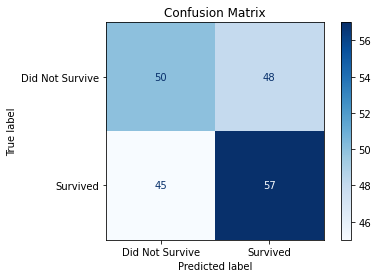

In [3]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


np.random.seed(42)
ages = np.random.uniform(0, 80, 200)
fares = np.random.uniform(0, 100, 200)
survival_prob = np.random.uniform(0, 1, 200)
actual_survival = np.random.choice([0, 1], size=200)


decision_threshold = 0.5
predicted_survival = (survival_prob >= decision_threshold).astype(int)


conf_matrix = confusion_matrix(actual_survival, predicted_survival)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Did Not Survive", "Survived"])
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

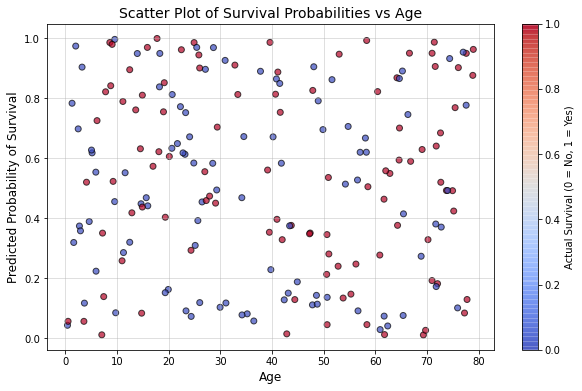

In [4]:
np.random.seed(42)
ages = np.random.uniform(0, 80, 200) 
fares = np.random.uniform(0, 100, 200) 
survival_prob = np.random.uniform(0, 1, 200) 
actual_survival = np.random.choice([0, 1], size=200)  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(ages, survival_prob, c=actual_survival, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Actual Survival (0 = No, 1 = Yes)')
plt.title("Scatter Plot of Survival Probabilities vs Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Predicted Probability of Survival", fontsize=12)
plt.grid(alpha=0.5)
plt.show()